In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Read the dataset
data = pd.read_csv("D:\extracted_features_charrec_dense7.csv", header=None)
data


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.000000,7.0,8.0,9.000000,...,55.000000,56.000000,57.0,58.000000,59.000000,60.000000,61.000000,62.000000,63.0,class_name
1,27.630783,0.000000,51.067493,0.0,26.302004,0.000000,0.000000,0.0,0.0,0.000000,...,35.563477,8.822042,0.0,18.269510,82.596970,0.000000,0.000000,1.751286,0.0,3333
2,41.934185,0.000000,57.616398,0.0,40.345722,0.000000,0.000000,0.0,0.0,0.000000,...,33.432617,22.573324,0.0,25.266916,71.188900,0.000000,0.000000,0.000000,0.0,3333
3,59.681458,0.000000,35.450397,0.0,51.084698,0.000000,0.000000,0.0,0.0,4.531399,...,17.747238,22.295591,0.0,9.600313,39.380276,0.000000,0.000000,13.358544,0.0,3333
4,25.652845,0.000000,42.711246,0.0,26.391441,0.000000,0.000000,0.0,0.0,0.000000,...,25.998358,12.029038,0.0,19.127953,60.226376,0.000000,0.000000,0.000000,0.0,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,0.000000,8.917019,12.606703,0.0,0.000000,23.875010,0.000000,0.0,0.0,9.403310,...,0.000000,9.477231,0.0,0.000000,46.723995,0.000000,20.901190,7.003646,0.0,3454
6654,12.088920,3.646342,28.106102,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,38.677414,0.000000,1.824834,7.562943,0.0,3454
6655,0.000000,0.000000,53.899130,0.0,0.000000,0.000000,12.079654,0.0,0.0,0.000000,...,12.388772,58.245360,0.0,0.000000,47.787598,5.880453,0.000000,3.556168,0.0,3454
6656,0.000000,0.000000,37.811558,0.0,0.000000,0.000000,8.555406,0.0,0.0,0.000000,...,7.663426,23.674717,0.0,0.000000,53.260387,3.350826,0.000000,8.673196,0.0,3454


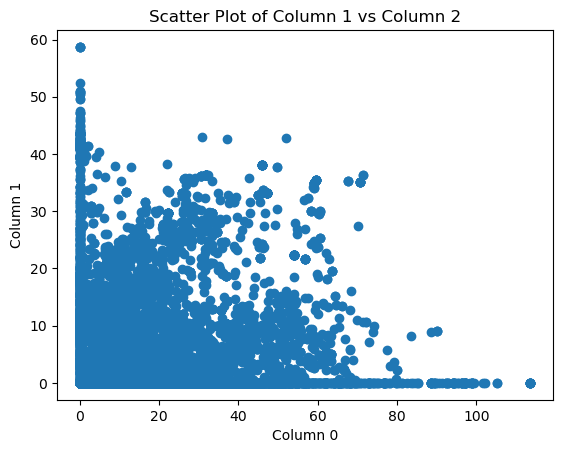

In [9]:
# Extract the first two columns
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.show()

In [15]:
# Extract the first two columns
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].round().astype(int)

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict the values using the model
y_pred = model.predict(x)

# Calculate the mean square error
mse = mean_squared_error(y, y_pred)

print("Mean Square Error:", mse)

Mean Square Error: 122.36923382383448


In [30]:


# Convert the problem to a binary classification problem
data.iloc[:, -1] = (data.iloc[:, -1] == 3333).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100, random_state=42, fit_intercept=True, class_weight=None)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

print("Test set accuracy:", accuracy)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0